In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import glob
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from scipy import stats
from mne.viz import circular_layout, plot_connectivity_circle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pyreadstat

from matplotlib import cm
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes


D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
state1 = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\Centroids_State_1.txt')
state2 = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\Centroids_State_2.txt')
state3 = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\Centroids_State_3.txt')
state4 = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\Centroids_State_4.txt')
# state5 = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\Centroids_State_5.txt')

In [3]:
print(state1.shape)

(60, 60)


In [79]:
axis = [0,11,17,29,47,54,60]
axis2 = [0,1,2,3,4,5,6]
# savename = "dFNC_state1_withoutbar.png"
# draw_fcm(state1,axis,savename,False,True)
# savename = "dFNC_state2_withoutbar.png"
# draw_fcm(state2,axis,savename,False,True)
# savename = "dFNC_state3_withoutbar.png"
# draw_fcm(state3,axis,savename,False,True)
# savename = "dFNC_state4_withoutbar.png"
# draw_fcm(state4,axis,savename,False,True)
# savename = "dFNC_state5_withoutbar.png"
# draw_fcm(state5,axis,savename,False,False)

In [37]:

#########  FCN ################
def draw_fcm(fcm,axis,savename,vrange = [-0.75,0.75],withbar = False,ifsave = False):
    jet = cm.get_cmap('jet') 
    f, ax = plt.subplots(figsize=(10, 10))
    heatmap = sns.heatmap(fcm, cmap=jet, vmax=vrange[1],vmin=vrange[0], center=0,
                square = True,linewidths=.5,cbar = withbar, cbar_kws={"shrink": .5},xticklabels=False, yticklabels=False)
    bottom, top = heatmap.get_ylim()
    heatmap.set_ylim(bottom + 0.5, top - 0.5)

    myfig = heatmap.get_figure()
    ax.tick_params(labelsize=6)
    ax.hlines(axis, *ax.get_xlim(), colors='black', linewidth=3)
    ax.vlines(axis, *ax.get_xlim(), colors='black', linewidth=3)
    myfig = heatmap.get_figure()
    if ifsave:
        myfig.savefig(savename,bbox_inches='tight', pad_inches=0, dpi=300)
    myfig.show()
    
def fcm2fnc(state1_fdr_left): # covert the fcm to fnc
    a = [(0,11),(11,17),(17,29),(29,47),(47,54),(54,60)]
    # print([i  for b,c in a for i in range(b,c)])
    state_fnc = np.ones([6,6])
    for i in range(6):
        b,c = a[i]
        for j in range(6):
            e,f = a[j]
            state_fnc[i,j]= np.sum(state1_fdr_left[b:c,e:f])
    return state_fnc

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


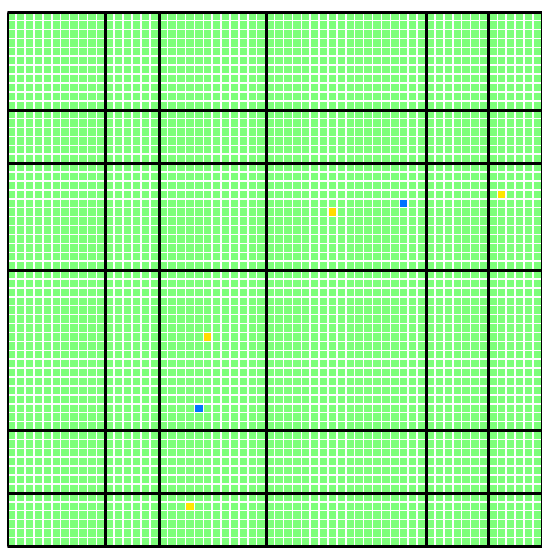

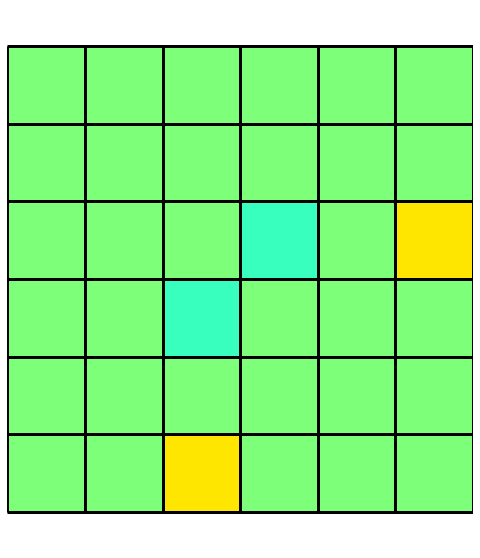

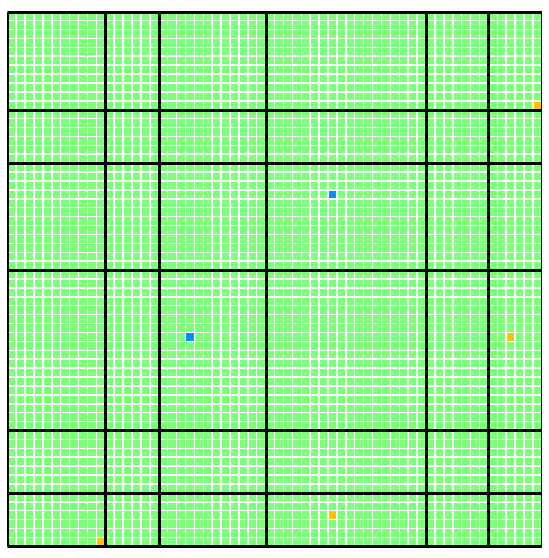

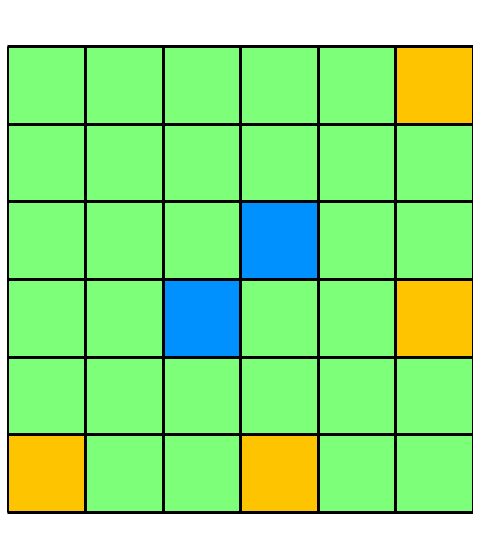

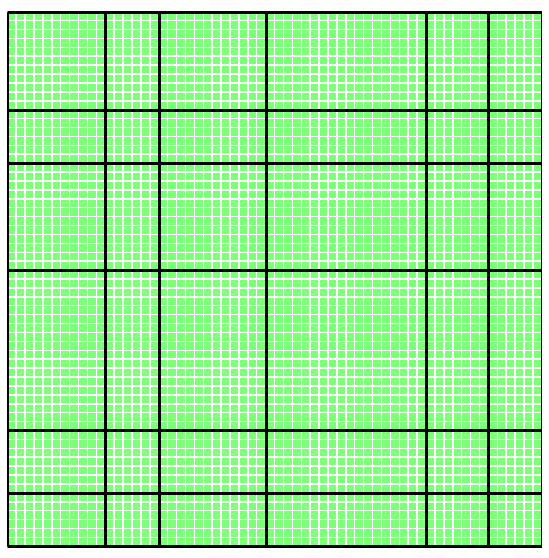

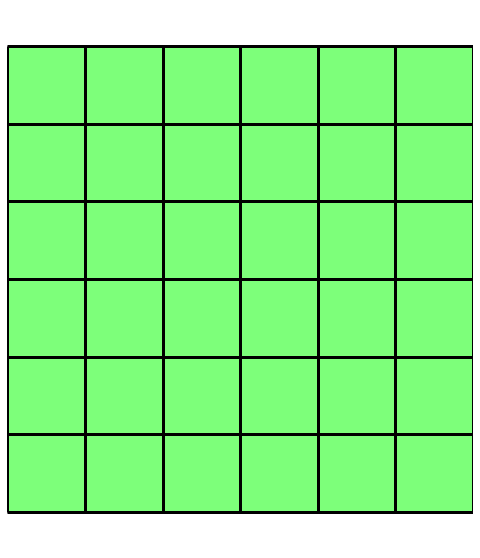

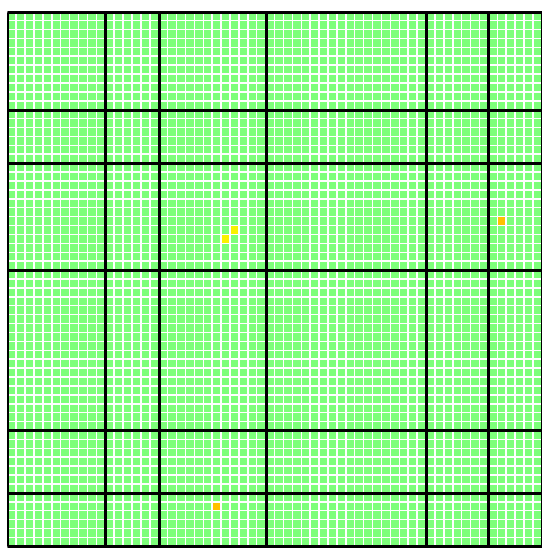

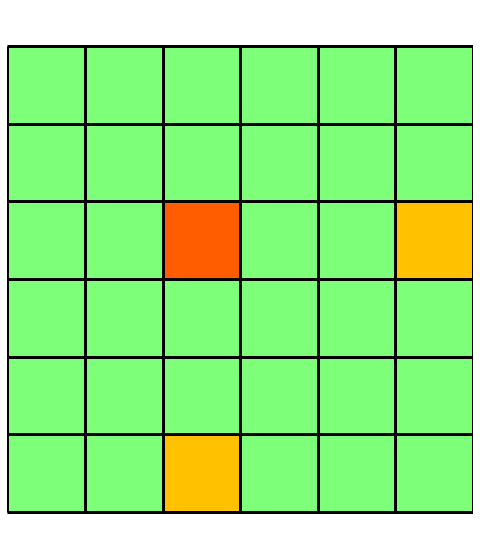

In [80]:
def state_difference(state_p, state_t):
    state_p2  = state_p.copy()
    state_t2 = state_t.copy()
    
    state_fdr_left = state_p < 0.05
    state_p2[~state_fdr_left] = 0
    state_p2[state_p2 == 0] = 1
    state_sign = np.sign(state_t2)
    
    state_p3 = -1*state_sign*np.log10(state_p2)
    return state_p3

state1_fdr_p = np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\state1_fdr_p.txt')
state_t= np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\state1_T_value.txt')
state1_fdr_left = state_difference(state1_fdr_p,state1_t)
savename = 'state1_fdr_difference_withbar.png'
draw_fcm(state1_fdr_left,axis,savename,[-5,5],False,True)
state1_fnc_fdr_left = fcm2fnc(state1_fdr_left)
savename_fnc = 'state1_fdr_fnc_difference_withoutbar.png'
draw_fcm(state1_fnc_fdr_left,axis2,savename_fnc,[-5,5],False,True)

# state1_t2[~state_fdr_left]= 0
# state1_p= np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\state1_P_value.txt')
# state1_t= np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\state1_T_value.txt')
# state1_fdr_left = state_difference(state1_p,state1_t)
# savename = 'state1_difference_withbar.png'
# # draw_fcm(state1_fdr_left,axis,savename,[-5,5],True,False)
# state1_fnc_fdr_left = fcm2fnc(state1_fdr_left)
# savename_fnc = 'state1_fnc_difference_withoutbar.png'
# draw_fcm(state1_fnc_fdr_left,axis2,savename_fnc,[-5,5],False,True)

state2_p= np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\state2_fdr_p.txt')
state2_t= np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\state2_T_value.txt')
state2_fdr_left = state_difference(state2_p,state2_t)
savename = 'state2_fdr_difference_withoutbar.png'
draw_fcm(state2_fdr_left,axis,savename,[-5,5],False,True)
state2_fnc_fdr_left = fcm2fnc(state2_fdr_left)
savename_fnc = 'state2_fdr_fnc_difference_withoutbar.png'
draw_fcm(state2_fnc_fdr_left,axis2,savename_fnc,[-5,5],False,True)

state3_p= np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\state3_fdr_p.txt')
state3_t= np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\state3_T_value.txt')
state3_fdr_left = state_difference(state3_p,state3_t)
savename = 'state3_fdr_difference_withbar.png'
draw_fcm(state3_fdr_left,axis,savename,[-5,5],False,True)
state3_fnc_fdr_left = fcm2fnc(state3_fdr_left)
savename_fnc = 'state3_fdr_fnc_difference_withoutbar.png'
draw_fcm(state3_fnc_fdr_left,axis2,savename_fnc,[-5,5],False,True)

state4_p= np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\state4_fdr_p.txt')
state4_t= np.loadtxt(r'H:\Matlab\Work\Age\Gift_FCM\ICA\DFNC\TR_30\state4_T_value.txt')
state4_fdr_left = state_difference(state4_p,state4_t)
savename = 'state4_fdr_difference_withbar.png'
draw_fcm(state4_fdr_left,axis,savename,[-5,5],False,True)
state4_fnc_fdr_left = fcm2fnc(state4_fdr_left)
savename_fnc = 'state4_fdr_fnc_difference_withoutbar.png'
draw_fcm(state4_fnc_fdr_left,axis2,savename_fnc,[-5,5],False,True)

In [47]:
state1_fnc_fdr_left

array([[ 36.02531987,  17.00817588, -32.99435434,  24.03417553,
          2.01128006,  10.00538202],
       [ 17.00817588, -24.00226015, -14.00274611, -20.01092309,
         -5.99676723,   4.        ],
       [-32.99435434, -14.00274611,  28.        ,  21.00701387,
         -6.9989226 , -12.007238  ],
       [ 24.03417553, -20.01092309,  21.00701387,  -5.9569624 ,
        -14.96912198,  11.00873816],
       [  2.01128006,  -5.99676723,  -6.9989226 , -14.96912198,
          8.00306703,  -2.01482507],
       [ 10.00538202,   4.        , -12.007238  ,  11.00873816,
         -2.01482507,  14.        ]])

In [23]:
a[1]

(11, 17)

In [30]:

        
# draw_fcm(state1_fdr_left,axis,savename,[-5,5],True,True)    

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


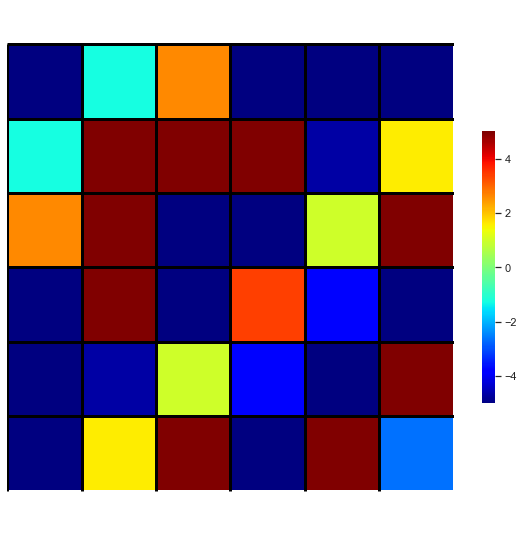

In [35]:
b,c,e,f
np.sum(state1_fdr_left[b:c,e:f])
state_fnc
savename ='11'
draw_fcm(state_fnc,[0,1,2,3,4,5],savename,[-5,5],True,False) 

In [25]:
sum(state1_fdr_left[b:c,e:f])

array([-6.56802107,  0.        , -8.86185011,  0.        , -6.32597092,
       -1.93832519, -1.58946528, -8.16765866, -8.52271451,  0.        ,
       -1.75122996])

In [18]:
state_fnc = np.ones([6,6])

In [19]:
state_fnc

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [73]:
state1_t2

array([[ 0.       ,  0.       , -3.2228337, ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  2.2625387,
         0.       ],
       [-3.2228337,  0.       ,  0.       , ...,  0.       ,  0.       ,
        -2.5350934],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  2.2625387,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       , -2.5350934, ...,  0.       ,  0.       ,
         0.       ]])

In [76]:
~state_fdr_left

array([[False,  True, False, ...,  True,  True,  True],
       [ True, False,  True, ...,  True, False,  True],
       [False,  True, False, ...,  True,  True, False],
       ...,
       [ True,  True,  True, ..., False,  True,  True],
       [ True, False,  True, ...,  True, False,  True],
       [ True,  True, False, ...,  True,  True, False]])